![(book cover)](https://covers.oreillystatic.com/images/0636920167433/cat.gif "(book cover)")
### **Programming Quantum Computers** by O'Reilly Media -  [**book Info**](http://shop.oreilly.com/product/0636920167433.do)  - [**all code samples**](https://oreilly-qc.github.io)

#### **Code samples for Chapter 2**
These code samples were written by Eric Johnston, Nic Harrigan, and Mercedes Gimeno-Segovia.



In [72]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
%matplotlib inline

counts: {'0': 1}
[1.+0.j 0.+0.j]


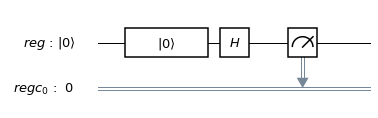

In [43]:
## Example 2-1: Random bit
# Set up the program
reg = QuantumRegister(1, name='reg')
reg_c = ClassicalRegister(1, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

counts: {'11000101': 1}
Random number: 163


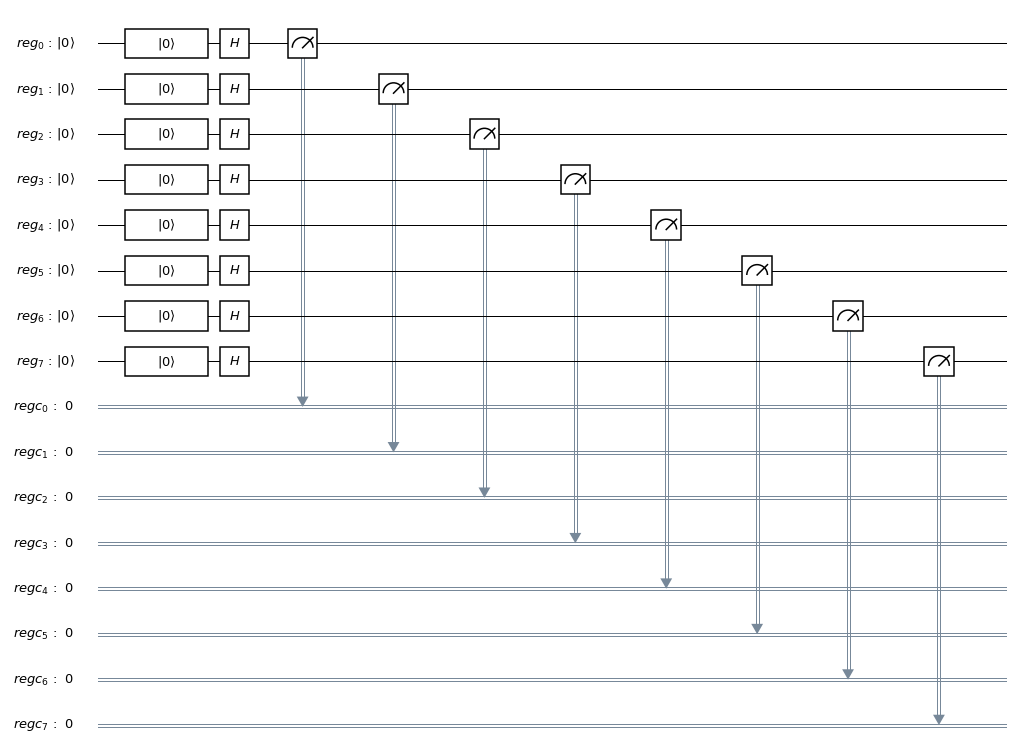

In [56]:
## Example 2-2: Random byte
# Set up the program
reg = QuantumRegister(8, name='reg')
reg_c = ClassicalRegister(8, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

# Convert the result into a random number
counts = result.get_counts(qc)
print('counts:',counts)
for key,val in counts.items():
    n = sum([(int(x) << i) for i,x in enumerate(key)])
    print('Random number:', n)

#outputstate = result.get_statevector(qc, decimals=3)
#print(outputstate)
qc.draw()        # draw the circuit

[0.+0.j 1.+0.j]


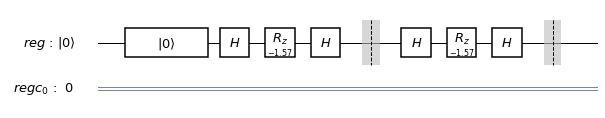

In [57]:
## Example 2-3: Root-of-not
# Set up the program
reg = QuantumRegister(1, name='reg')
reg_c = ClassicalRegister(1, name='regc')
qc = QuantumCircuit(reg, reg_c)

qc.reset(reg)          # write the value 0

# One root-of-not gate
qc.h(reg)
qc.rz(math.radians(-90), reg)
qc.h(reg)
qc.barrier()
# One root-of-not gate
qc.h(reg)
qc.rz(math.radians(-90), reg)
qc.h(reg)
qc.barrier()

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit

counts: {'0 0 0 0 0': 1}
No spies detected.
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


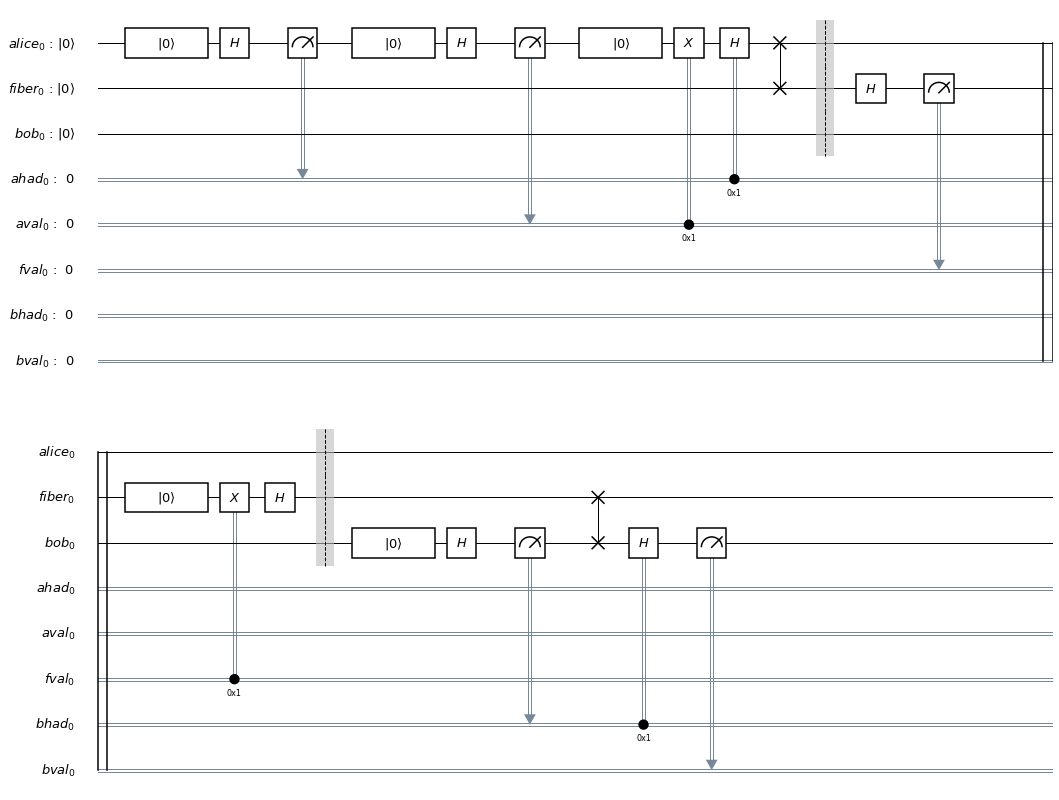

In [76]:
## Example 2-4: Quasntum Spy Hunter
# Set up the program
alice = QuantumRegister(1, name='alice')
fiber = QuantumRegister(1, name='fiber')
bob   = QuantumRegister(1, name='bob')
alice_had = ClassicalRegister(1, name='ahad')
alice_val = ClassicalRegister(1, name='aval')
fiber_val = ClassicalRegister(1, name='fval')
bob_had   = ClassicalRegister(1, name='bhad')
bob_val   = ClassicalRegister(1, name='bval')
qc = QuantumCircuit(alice, fiber, bob, alice_had, alice_val, fiber_val, bob_had, bob_val)

# Use Alice's QPU to generate two random bits
qc.reset(alice)          # write the value 0
qc.h(alice)
qc.measure(alice, alice_had)
qc.reset(alice)          # write the value 0
qc.h(alice)
qc.measure(alice, alice_val)

# Prepare Alice's qubit
qc.reset(alice)          # write the value 0
qc.x(alice).c_if(alice_val, 1)
qc.h(alice).c_if(alice_had, 1)

# Send the qubit!
qc.swap(alice, fiber)

# Activate the spy
spy_is_present = True
if spy_is_present:
    qc.barrier()
    spy_had = True
    if spy_had:
        qc.h(fiber)
    qc.measure(fiber, fiber_val)
    qc.reset(fiber)
    qc.x(fiber).c_if(fiber_val, 1)
    if spy_had:
        qc.h(fiber)

qc.barrier()

# Use Bob's QPU to generate a random bit
qc.reset(bob)
qc.h(bob)
qc.measure(bob, bob_had)

# Receive the qubit!
qc.swap(fiber, bob)
qc.h(bob).c_if(bob_had, 1)
qc.measure(bob, bob_val)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

# Now Alice emails Bob to tell
# him her had setting and value.
# If the had setting matches and the
# value does not, there's a spy!
counts = result.get_counts(qc)
print('counts:',counts)
caught = False
for key,val in counts.items():
    ahad,aval,f,bhad,bval = (int(x) for x in key.split(' '))
    if ahad == bhad:
        if aval != bval:
            print('Caught a spy!')
            caught = True
if not caught:
    print('No spies detected.')

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit